In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from faker import Faker
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Generate synthetic dataset

In [2]:
fake = Faker()

health_tips = {
    'Hypertension': [
        "Reduce sodium intake.",
        "Manage stress effectively.",
        "Limit alcohol consumption."
    ],
    'Asthma': [
        "Avoid known allergens and triggers.",
        "Use prescribed inhalers properly.",
    ],
    'Cholesterol': [
        "Increase soluble fiber in your diet.",
        "Avoid trans fats.",
        "Manage stress and quit smoking."
    ]
}

In [3]:
def generate_bmi(medical_condition):
    if medical_condition == 'Hypertension':
        return round(random.uniform(24, 32), 2)
    elif medical_condition == 'Asthma':
        return round(random.uniform(20, 30), 2)
    else:
        return round(random.uniform(25, 35), 2)

In [4]:
def generate_smoking(medical_condition):
    if medical_condition == 'Asthma':
        return 'No' 
    else:
        return fake.random_element(elements=('Yes', 'No'))

In [5]:
def generate_sleep_time(medical_condition):
    if medical_condition == 'Hypertension':
        return round(random.uniform(5, 7), 1)
    elif medical_condition == 'Asthma':
        return round(random.uniform(7, 9), 1)
    elif medical_condition == 'Cholesterol':
        return round(random.uniform(6, 8), 1)
    else:
        return round(random.uniform(6, 9), 1)

In [6]:
data = []
for _ in range(15000):
    medical_condition = fake.random_element(elements=list(health_tips.keys()))
    entry = {
        'Age': fake.random_int(min=18, max=90),
        'Gender': fake.random_element(elements=('Male', 'Female')),
        'Medical_Condition': medical_condition,
        'Health_Tips': random.choice(health_tips[medical_condition]),
        'BMI': generate_bmi(medical_condition),
        'Smoking': generate_smoking(medical_condition),
        'SleepTime': generate_sleep_time(medical_condition)
    }
    data.append(entry)

In [7]:
data

[{'Age': 73,
  'Gender': 'Male',
  'Medical_Condition': 'Asthma',
  'Health_Tips': 'Avoid known allergens and triggers.',
  'BMI': 25.88,
  'Smoking': 'No',
  'SleepTime': 7.5},
 {'Age': 86,
  'Gender': 'Male',
  'Medical_Condition': 'Asthma',
  'Health_Tips': 'Use prescribed inhalers properly.',
  'BMI': 27.31,
  'Smoking': 'No',
  'SleepTime': 8.8},
 {'Age': 40,
  'Gender': 'Female',
  'Medical_Condition': 'Asthma',
  'Health_Tips': 'Avoid known allergens and triggers.',
  'BMI': 29.2,
  'Smoking': 'No',
  'SleepTime': 7.6},
 {'Age': 63,
  'Gender': 'Male',
  'Medical_Condition': 'Asthma',
  'Health_Tips': 'Use prescribed inhalers properly.',
  'BMI': 23.49,
  'Smoking': 'No',
  'SleepTime': 7.4},
 {'Age': 81,
  'Gender': 'Female',
  'Medical_Condition': 'Hypertension',
  'Health_Tips': 'Limit alcohol consumption.',
  'BMI': 27.22,
  'Smoking': 'Yes',
  'SleepTime': 6.0},
 {'Age': 41,
  'Gender': 'Male',
  'Medical_Condition': 'Asthma',
  'Health_Tips': 'Use prescribed inhalers prope

In [8]:
df = pd.DataFrame(data)
df1 = pd.DataFrame(data)
df

,Age,Gender,Medical_Condition,Health_Tips,BMI,Smoking,SleepTime
0,73,Male,Asthma,Avoid known allergens and triggers.,25.88,No,7.5
1,86,Male,Asthma,Use prescribed inhalers properly.,27.31,No,8.8
2,40,Female,Asthma,Avoid known allergens and triggers.,29.20,No,7.6
3,63,Male,Asthma,Use prescribed inhalers properly.,23.49,No,7.4
4,81,Female,Hypertension,Limit alcohol consumption.,27.22,Yes,6.0
...,...,...,...,...,...,...,...
14995,72,Female,Hypertension,Limit alcohol consumption.,30.63,Yes,5.8
14996,35,Male,Asthma,Use prescribed inhalers properly.,26.89,No,9.0
14997,78,Female,Cholesterol,Increase soluble fiber in your diet.,31.55,Yes,7.3
14998,23,Female,Hypertension,Limit alcohol consumption.,27.96,No,6.5


In [11]:
print('Number of rows :',df.shape[0])
print('Number of columns :',df.shape[1])

Number of rows : 15000
Number of columns : 7


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                15000 non-null  int64  
 1   Gender             15000 non-null  object 
 2   Medical_Condition  15000 non-null  object 
 3   Health_Tips        15000 non-null  object 
 4   BMI                15000 non-null  float64
 5   Smoking            15000 non-null  object 
 6   SleepTime          15000 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 820.4+ KB


In [13]:
df.describe()

,Age,BMI,SleepTime
count,15000.000000,15000.000000,15000.000000
mean,54.008533,27.639747,7.013300
std,20.984634,3.424285,0.998058
min,18.000000,20.000000,5.000000
25%,36.000000,25.350000,6.300000
50%,54.000000,27.670000,7.000000
75%,72.000000,29.990000,7.800000
max,90.000000,35.000000,9.000000


In [14]:
df.describe(include = 'object')

,Gender,Medical_Condition,Health_Tips,Smoking
count,15000,15000,15000,15000
unique,2,3,8,2
top,Male,Asthma,Avoid known allergens and triggers.,No
freq,7527,5090,2566,10040


In [15]:
df.duplicated().sum()

4

# Missing Value

In [16]:
df.isnull().sum()

Age                  0
Gender               0
Medical_Condition    0
Health_Tips          0
BMI                  0
Smoking              0
SleepTime            0
dtype: int64

There is no null Value

# EDA 

In [17]:
df_num = df.select_dtypes(include = 'number')
df_num

,Age,BMI,SleepTime
0,73,25.88,7.5
1,86,27.31,8.8
2,40,29.20,7.6
3,63,23.49,7.4
4,81,27.22,6.0
...,...,...,...
14995,72,30.63,5.8
14996,35,26.89,9.0
14997,78,31.55,7.3
14998,23,27.96,6.5


In [18]:
df_cat = df.select_dtypes(include = 'object')
df_cat

,Gender,Medical_Condition,Health_Tips,Smoking
0,Male,Asthma,Avoid known allergens and triggers.,No
1,Male,Asthma,Use prescribed inhalers properly.,No
2,Female,Asthma,Avoid known allergens and triggers.,No
3,Male,Asthma,Use prescribed inhalers properly.,No
4,Female,Hypertension,Limit alcohol consumption.,Yes
...,...,...,...,...
14995,Female,Hypertension,Limit alcohol consumption.,Yes
14996,Male,Asthma,Use prescribed inhalers properly.,No
14997,Female,Cholesterol,Increase soluble fiber in your diet.,Yes
14998,Female,Hypertension,Limit alcohol consumption.,No


In [19]:
num_col = df_num.columns.to_list()
num_col

['Age', 'BMI', 'SleepTime']

In [20]:
len(num_col)

3

In [21]:
cat_col = ['Gender', 'Medical_Condition']
cat_col

['Gender', 'Medical_Condition']

In [22]:
df[num_col].corr()

,Age,BMI,SleepTime
Age,1.000000,-0.009488,0.007685
BMI,-0.009488,1.000000,-0.304827
SleepTime,0.007685,-0.304827,1.000000


In [23]:
df[num_col].skew()

Age         -0.007566
BMI         -0.082229
SleepTime   -0.015001
dtype: float64

# Univariate Ploting

### Numerical Column

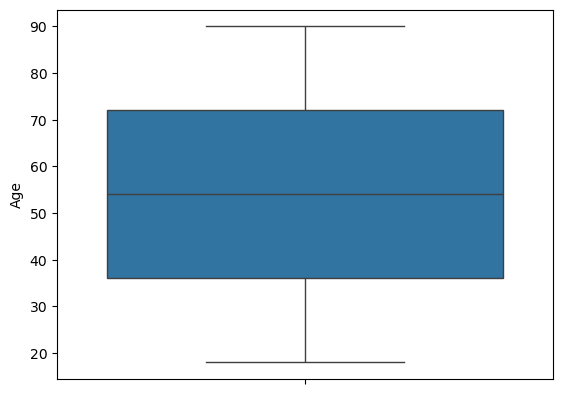

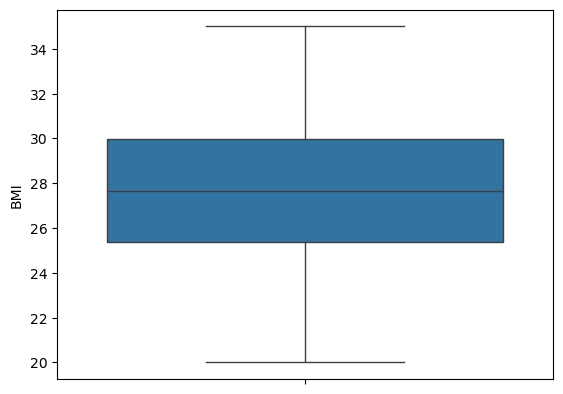

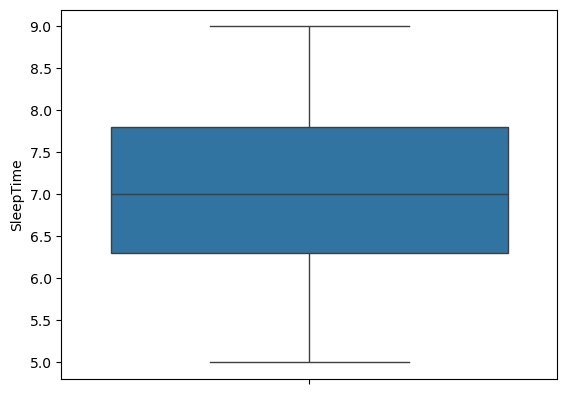

In [24]:
for i in num_col:
    ax = plt.subplots(1,1)
    sns.boxplot(df[i])

<Figure size 1500x1000 with 0 Axes>

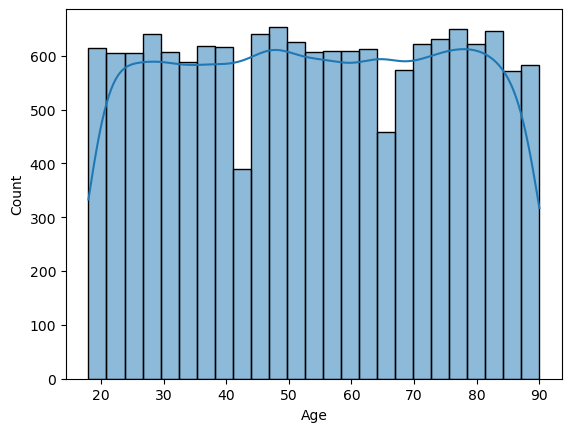

<Figure size 1500x1000 with 0 Axes>

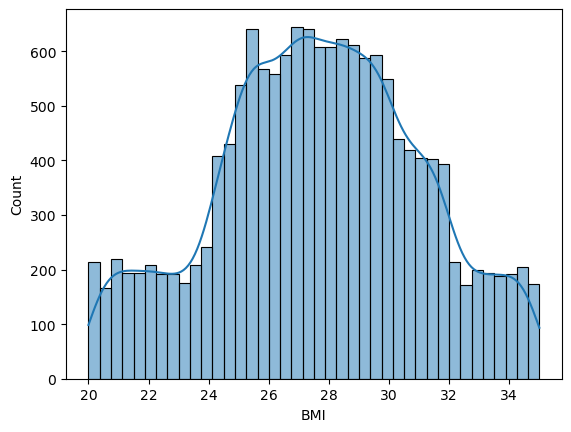

<Figure size 1500x1000 with 0 Axes>

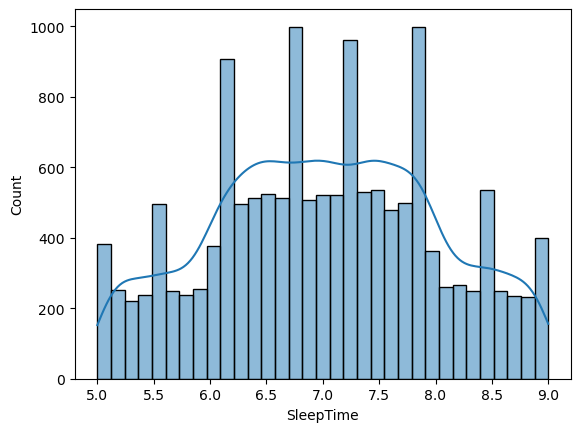

In [25]:
for i in num_col:
    plt.figure(figsize=(15,10))
    ax = plt.subplots(1,1)
    sns.histplot(df[i] , kde = True)
    plt.show()

## Categorical Plotting

C:\Users\anasr\AppData\Local\Temp\ipykernel_15792\3160015267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df[i].value_counts(), palette = 'viridis')


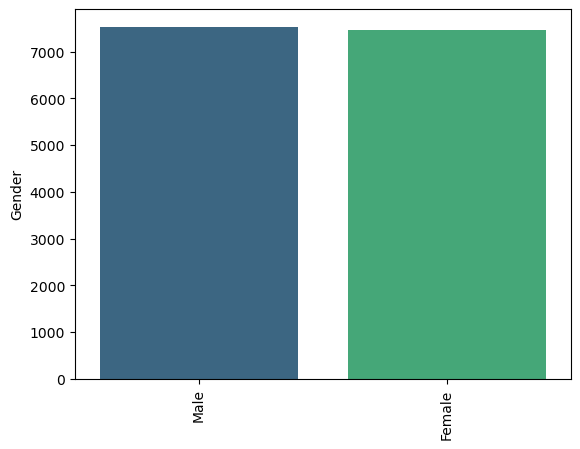

C:\Users\anasr\AppData\Local\Temp\ipykernel_15792\3160015267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df[i].value_counts(), palette = 'viridis')


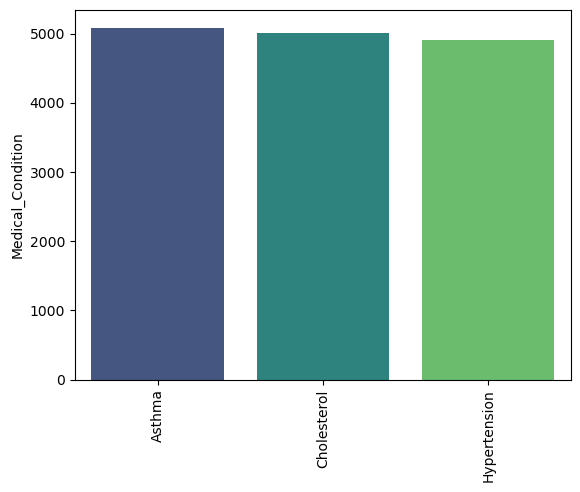

In [26]:
for i in cat_col:
    sns.barplot(df[i].value_counts(), palette = 'viridis')
    plt.xticks(rotation = 'vertical')
    plt.show()

# Target Column Ploting

In [27]:
df.Health_Tips.value_counts()

Avoid known allergens and triggers.     2566
Use prescribed inhalers properly.       2524
Avoid trans fats.                       1698
Increase soluble fiber in your diet.    1673
Reduce sodium intake.                   1657
Limit alcohol consumption.              1637
Manage stress and quit smoking.         1636
Manage stress effectively.              1609
Name: Health_Tips, dtype: int64

C:\Users\anasr\AppData\Local\Temp\ipykernel_15792\3218220667.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df['Health_Tips'].value_counts(), palette = 'viridis')


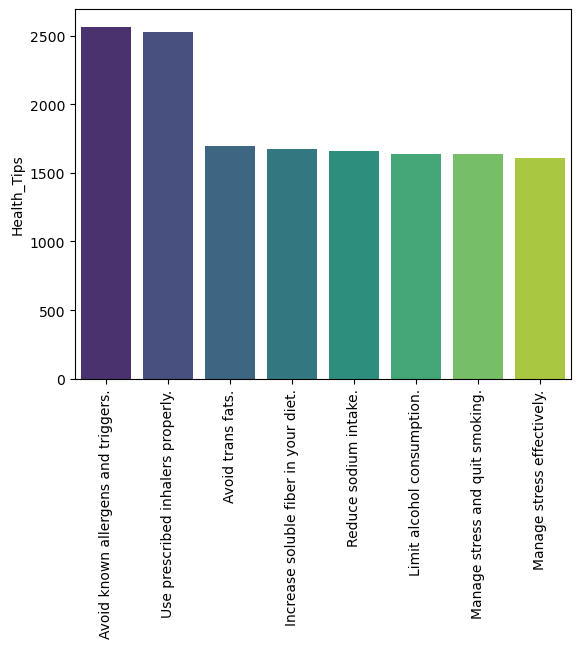

In [28]:
sns.barplot(data = df['Health_Tips'].value_counts(), palette = 'viridis')
plt.xticks(rotation='vertical')
plt.show()

# Bivariate Plot

### Numerical Vs Target

C:\Users\anasr\AppData\Local\Temp\ipykernel_15792\1440310308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df['Health_Tips'] , y = df[i] , palette = 'tab10' )


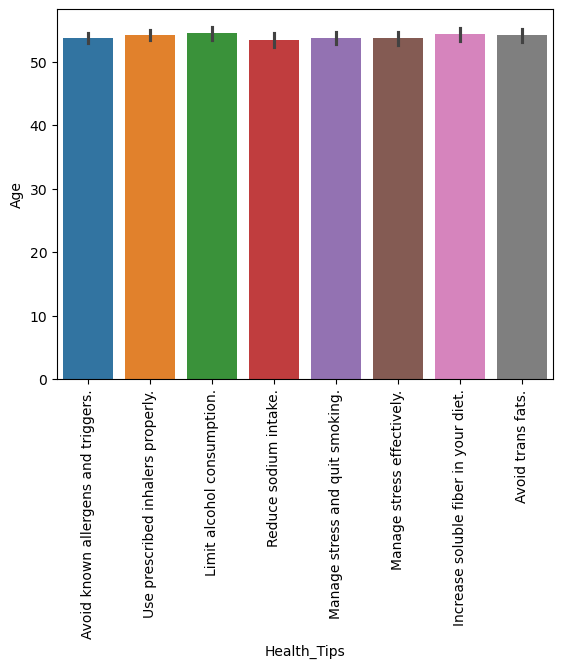

C:\Users\anasr\AppData\Local\Temp\ipykernel_15792\1440310308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df['Health_Tips'] , y = df[i] , palette = 'tab10' )


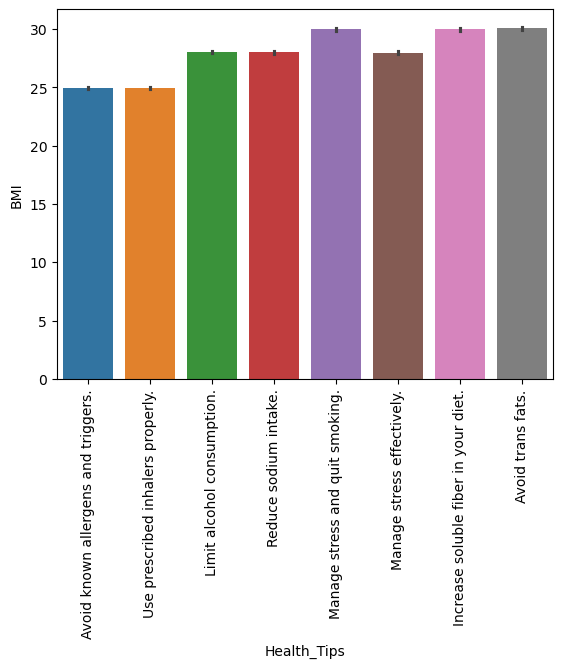

C:\Users\anasr\AppData\Local\Temp\ipykernel_15792\1440310308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df['Health_Tips'] , y = df[i] , palette = 'tab10' )


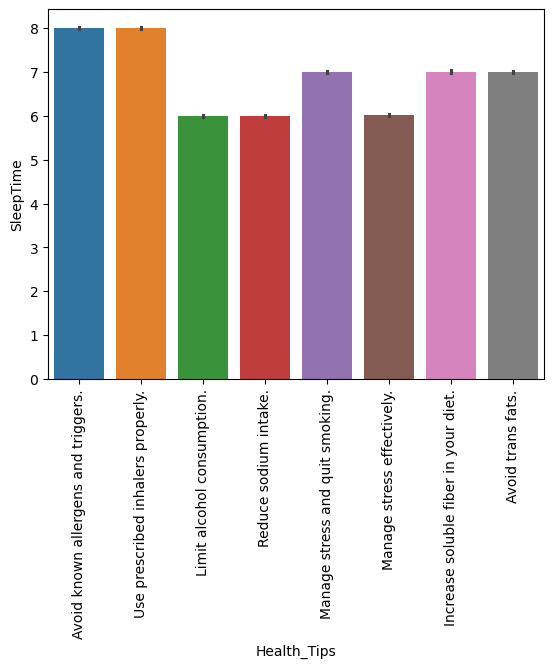

In [29]:
for i in num_col:
    plt.figure()
    sns.barplot(x= df['Health_Tips'] , y = df[i] , palette = 'tab10' )
    plt.xticks(rotation = 'vertical')
    plt.show()

# Categorical Vs Target

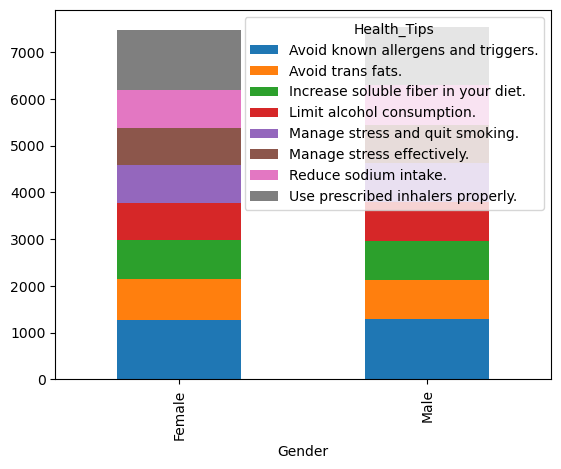

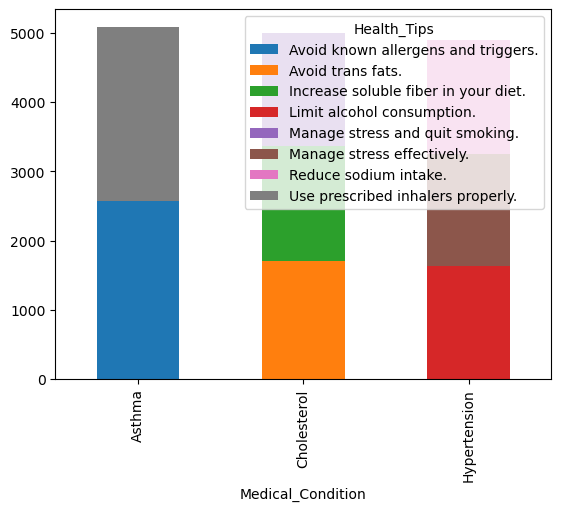

In [30]:
for i in cat_col:
    pd.crosstab(df[i], df['Health_Tips']).plot(kind='bar', stacked=True)

# Multivariate Plot

<Axes: >

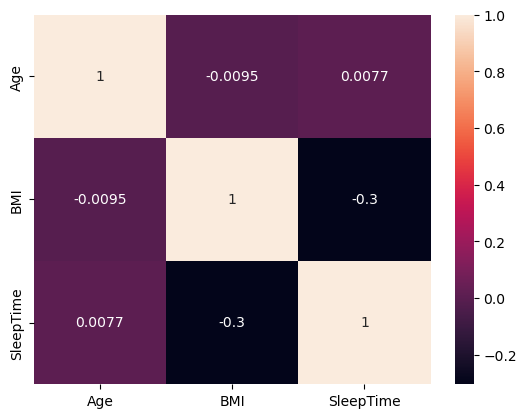

In [31]:
plt.figure()
sns.heatmap(df[num_col].corr(),annot = True)

# Treating Outliers

In [32]:
df[num_col].skew()

Age         -0.007566
BMI         -0.082229
SleepTime   -0.015001
dtype: float64

# Encoding

In [33]:
label_encoder = LabelEncoder()
df['Medical_Condition'] = label_encoder.fit_transform(df[['Medical_Condition']])

C:\Users\anasr\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
from sklearn.preprocessing import OrdinalEncoder

In [35]:
ordinal_encoder = OrdinalEncoder(categories=[['Male','Female']])
df['Gender'] = ordinal_encoder.fit_transform(df[['Gender']])

In [36]:
df['Health_Tips'] = label_encoder.fit_transform(df['Health_Tips'])

In [37]:
df.Health_Tips.sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [38]:
df['Smoking'] = label_encoder.fit_transform(df[['Smoking']])

C:\Users\anasr\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
df.Medical_Condition.unique()

array([0, 2, 1])

In [40]:
df

,Age,Gender,Medical_Condition,Health_Tips,BMI,Smoking,SleepTime
0,73,0.0,0,0,25.88,0,7.5
1,86,0.0,0,7,27.31,0,8.8
2,40,1.0,0,0,29.20,0,7.6
3,63,0.0,0,7,23.49,0,7.4
4,81,1.0,2,3,27.22,1,6.0
...,...,...,...,...,...,...,...
14995,72,1.0,2,3,30.63,1,5.8
14996,35,0.0,0,7,26.89,0,9.0
14997,78,1.0,1,2,31.55,1,7.3
14998,23,1.0,2,3,27.96,0,6.5


# Train Test Split

In [41]:
df1.Health_Tips.value_counts(normalize=True)

Avoid known allergens and triggers.     0.171067
Use prescribed inhalers properly.       0.168267
Avoid trans fats.                       0.113200
Increase soluble fiber in your diet.    0.111533
Reduce sodium intake.                   0.110467
Limit alcohol consumption.              0.109133
Manage stress and quit smoking.         0.109067
Manage stress effectively.              0.107267
Name: Health_Tips, dtype: float64

In [42]:
X = df.drop(columns = 'Health_Tips')  
y = df['Health_Tips'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN 

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)  

knn_model = knn.fit(X_train, y_train)

In [44]:
y_pred = knn_model.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52       775
           1       0.33      0.52      0.40       499
           2       0.32      0.28      0.29       493
           3       0.35      0.49      0.40       487
           4       0.35      0.23      0.28       516
           5       0.34      0.27      0.30       476
           6       0.34      0.22      0.27       527
           7       0.51      0.52      0.51       727

    accuracy                           0.40      4500
   macro avg       0.38      0.38      0.37      4500
weighted avg       0.40      0.40      0.39      4500



# Cosine Similarity

### Generate synthetic dataset

In [46]:
fake = Faker()

health_tips = {
    'Hypertension': [
        "Reduce sodium intake.",
        "Exercise regularly.",
        "Maintain a healthy weight.",
        "Manage stress effectively.",
        "Limit alcohol consumption."
    ],
    'Asthma': [
        "Avoid known allergens and triggers.",
        "Use prescribed inhalers properly.",
        "Maintain a healthy weight.",
        "Practice breathing exercises.",
        "Get regular check-ups with your doctor."
    ],
    'Cholesterol': [
        "Reduce saturated fat intake.",
        "Increase soluble fiber in your diet.",
        "Engage in regular aerobic exercise.",
        "Avoid trans fats.",
        "Manage stress and quit smoking."
    ]
}

In [47]:
def generate_bmi(medical_condition):
    if medical_condition == 'Hypertension':
        return round(random.uniform(24, 32), 2)
    elif medical_condition == 'Asthma':
        return round(random.uniform(20, 30), 2)
    else:
        return round(random.uniform(25, 35), 2)

In [48]:
def generate_smoking(medical_condition):
    if medical_condition == 'Asthma':
        return 'No' 
    else:
        return fake.random_element(elements=('Yes', 'No'))

In [49]:
def generate_sleep_time(medical_condition):
    if medical_condition == 'Hypertension':
        return round(random.uniform(5, 7), 1)
    elif medical_condition == 'Asthma':
        return round(random.uniform(7, 9), 1)
    elif medical_condition == 'Cholesterol':
        return round(random.uniform(6, 8), 1)
    else:
        return round(random.uniform(6, 9), 1)


In [50]:
data = []
for _ in range(15000):
    medical_condition = fake.random_element(elements=list(health_tips.keys()))
    entry = {
        'Age': fake.random_int(min=18, max=90),
        'Gender': fake.random_element(elements=('Male', 'Female')),
        'Medical_Condition': medical_condition,
        'Health_Tips': random.choice(health_tips[medical_condition]),
        'BMI': generate_bmi(medical_condition),
        'Smoking': generate_smoking(medical_condition),
        'SleepTime': generate_sleep_time(medical_condition)
    }
    data.append(entry)

In [51]:
data

[{'Age': 36,
  'Gender': 'Male',
  'Medical_Condition': 'Cholesterol',
  'Health_Tips': 'Manage stress and quit smoking.',
  'BMI': 31.01,
  'Smoking': 'No',
  'SleepTime': 6.2},
 {'Age': 35,
  'Gender': 'Female',
  'Medical_Condition': 'Asthma',
  'Health_Tips': 'Practice breathing exercises.',
  'BMI': 29.98,
  'Smoking': 'No',
  'SleepTime': 8.2},
 {'Age': 66,
  'Gender': 'Male',
  'Medical_Condition': 'Asthma',
  'Health_Tips': 'Avoid known allergens and triggers.',
  'BMI': 28.74,
  'Smoking': 'No',
  'SleepTime': 8.1},
 {'Age': 86,
  'Gender': 'Male',
  'Medical_Condition': 'Hypertension',
  'Health_Tips': 'Maintain a healthy weight.',
  'BMI': 30.0,
  'Smoking': 'No',
  'SleepTime': 6.9},
 {'Age': 50,
  'Gender': 'Female',
  'Medical_Condition': 'Asthma',
  'Health_Tips': 'Maintain a healthy weight.',
  'BMI': 24.61,
  'Smoking': 'No',
  'SleepTime': 8.0},
 {'Age': 31,
  'Gender': 'Male',
  'Medical_Condition': 'Hypertension',
  'Health_Tips': 'Limit alcohol consumption.',
  'BM

In [52]:
df2 = pd.DataFrame(data)
df2

,Age,Gender,Medical_Condition,Health_Tips,BMI,Smoking,SleepTime
0,36,Male,Cholesterol,Manage stress and quit smoking.,31.01,No,6.2
1,35,Female,Asthma,Practice breathing exercises.,29.98,No,8.2
2,66,Male,Asthma,Avoid known allergens and triggers.,28.74,No,8.1
3,86,Male,Hypertension,Maintain a healthy weight.,30.00,No,6.9
4,50,Female,Asthma,Maintain a healthy weight.,24.61,No,8.0
...,...,...,...,...,...,...,...
14995,72,Female,Hypertension,Exercise regularly.,26.67,No,6.8
14996,50,Male,Cholesterol,Increase soluble fiber in your diet.,28.23,No,6.3
14997,32,Female,Cholesterol,Increase soluble fiber in your diet.,31.88,No,7.1
14998,86,Female,Hypertension,Reduce sodium intake.,30.40,No,6.6


# TFIDF Vectorizer

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [54]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df2['Health_Tips'])

# Cosine Similarity Function

In [55]:
def recommend_health_tips(age, gender, medical_condition, bmi=None, smoking=None, sleep_time=None, df=df2, top_n=3):
    
    filtered_df = df2[(df2['Age'] == age) & 
                     (df2['Gender'] == gender) & 
                     (df2['Medical_Condition'] == medical_condition)]
    
    
    if bmi is not None:
        filtered_df = filtered_df[filtered_df['BMI'] == bmi]
    if smoking is not None:
        filtered_df = filtered_df[filtered_df['Smoking'] == smoking]
    if sleep_time is not None:
        filtered_df = filtered_df[filtered_df['SleepTime'] == sleep_time]
    
    if filtered_df.empty:
        return "No health tips available for the given parameters."
    
    
    health_tips_list = filtered_df['Health_Tips'].tolist()
    
    if not health_tips_list:
        return "No health tips available for the given parameters."
    
    
    input_health_tip = health_tips_list[0]
    
    
    input_vector = vectorizer.transform([input_health_tip])
    
    
    sim_scores = cosine_similarity(input_vector, X).flatten()
    
    
    sim_scores = list(enumerate(sim_scores))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    
    recommendations = []
    for index, score in sim_scores[1:]:  
        if df2['Health_Tips'].iloc[index] not in recommendations:  
            recommendations.append(df2['Health_Tips'].iloc[index])
        if len(recommendations) == top_n:  
            break
    
    if not recommendations:
        return "No distinct health tips available for the given parameters."
    
    return recommendations

# Health Tips

In [63]:
df2[df2['Medical_Condition']=='Asthma']

,Age,Gender,Medical_Condition,Health_Tips,BMI,Smoking,SleepTime
1,35,Female,Asthma,Practice breathing exercises.,29.98,No,8.2
2,66,Male,Asthma,Avoid known allergens and triggers.,28.74,No,8.1
4,50,Female,Asthma,Maintain a healthy weight.,24.61,No,8.0
11,41,Female,Asthma,Get regular check-ups with your doctor.,25.58,No,7.9
15,67,Female,Asthma,Practice breathing exercises.,26.87,No,8.4
...,...,...,...,...,...,...,...
14990,40,Female,Asthma,Get regular check-ups with your doctor.,28.83,No,7.5
14991,68,Female,Asthma,Avoid known allergens and triggers.,22.72,No,8.8
14992,44,Female,Asthma,Avoid known allergens and triggers.,22.18,No,7.7
14993,74,Female,Asthma,Practice breathing exercises.,28.31,No,8.7


### Sample 1

In [64]:
age = 66
gender = 'Male'
medical_condition = 'Asthma'
bmi = 28.74  
smoking = 'No'  
sleep_time = 8.1  

In [65]:
health_tips = recommend_health_tips(age, gender, medical_condition, bmi, smoking, sleep_time)
print(health_tips)

['Avoid known allergens and triggers.', 'Avoid trans fats.', 'Manage stress and quit smoking.']


### Sample 2

In [58]:
age = 61
gender = 'Male'
medical_condition = 'Cholesterol'

In [59]:
health_tips = recommend_health_tips(age, gender, medical_condition)
print(health_tips)

['Reduce saturated fat intake.', 'Reduce sodium intake.', 'Manage stress and quit smoking.']
